Load Dataset


In [127]:
import pandas as pd
import numpy as np

In [128]:
dataset = pd.read_csv('913790497.csv', sep=';', encoding='latin1')

In [129]:
dataset.shape

(186, 2)

In [130]:
dataset.head(5)

,review,rating
0,"Paketnya sudah di terima dalam kondisi baik, k...",5.0
1,Alhamdulillah makasih bos q udh yg k 2 barang ...,5.0
2,alhamdulillah realpict terus sih kalau disini ...,5.0
3,real bgt ga prnh kecewa bli di toko nie,5.0
4,"BAHANYAAA BAGUSSS BANGETTTTTTT,\nPAKETNYA DATE...",NaN


In [131]:
# token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [132]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [133]:
dataset['step1'] = dataset['review'].apply(word_tokenize_wrapper)

In [134]:
dataset.head()

,review,rating,step1
0,"Paketnya sudah di terima dalam kondisi baik, k...",5.0,"[Paketnya, sudah, di, terima, dalam, kondisi, ..."
1,Alhamdulillah makasih bos q udh yg k 2 barang ...,5.0,"[Alhamdulillah, makasih, bos, q, udh, yg, k, 2..."
2,alhamdulillah realpict terus sih kalau disini ...,5.0,"[alhamdulillah, realpict, terus, sih, kalau, d..."
3,real bgt ga prnh kecewa bli di toko nie,5.0,"[real, bgt, ga, prnh, kecewa, bli, di, toko, nie]"
4,"BAHANYAAA BAGUSSS BANGETTTTTTT,\nPAKETNYA DATE...",NaN,"[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA..."


In [135]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

dataset['review_perbaikan'] = dataset['step1'].apply(normalized_term)

C:\Users\acer\AppData\Local\Temp\ipykernel_9548\1630198595.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\acer\AppData\Local\Temp\ipykernel_9548\1630198595.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


In [136]:
dataset.head(10)

,review,rating,step1,review_perbaikan
0,"Paketnya sudah di terima dalam kondisi baik, k...",5.0,"[Paketnya, sudah, di, terima, dalam, kondisi, ...","[Paketnya, sudah, di, terima, dalam, kondisi, ..."
1,Alhamdulillah makasih bos q udh yg k 2 barang ...,5.0,"[Alhamdulillah, makasih, bos, q, udh, yg, k, 2...","[Alhamdulillah, makasih, bos, q, sudah, yang, ..."
2,alhamdulillah realpict terus sih kalau disini ...,5.0,"[alhamdulillah, realpict, terus, sih, kalau, d...","[syukur, realpict, terus, sih, kalau, disini, ..."
3,real bgt ga prnh kecewa bli di toko nie,5.0,"[real, bgt, ga, prnh, kecewa, bli, di, toko, nie]","[real, banget, tidak, prnh, kecewa, bli, di, t..."
4,"BAHANYAAA BAGUSSS BANGETTTTTTT,\nPAKETNYA DATE...",NaN,"[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA...","[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA..."
5,"selalu puas beli baju disini, bahan bagus dan ...",5.0,"[selalu, puas, beli, baju, disini, ,, bahan, b...","[selalu, puas, beli, baju, disini, ,, bahan, b..."
6,"real pict, bahannya bagus banget. kurirnya jug...",5.0,"[real, pict, ,, bahannya, bagus, banget, ., ku...","[real, pict, ,, bahannya, bagus, banget, ., ku..."
7,lumayan bagus..halus kainnya. mksh lazada. mks...,5.0,"[lumayan, bagus, .., halus, kainnya, ., mksh, ...","[lumayan, bagus, .., halus, kainnya, ., mksh, ..."
8,mantap deh,5.0,"[mantap, deh]","[mantap, deh]"
9,"tolong kalau jualan itu yg jujur, ini bukan ba...",1.0,"[tolong, kalau, jualan, itu, yg, jujur, ,, ini...","[tolong, kalau, jualan, itu, yang, jujur, ,, i..."


In [137]:
missing_count = dataset.isnull().sum()
print(missing_count)


review               0
rating              23
step1                0
review_perbaikan     0
dtype: int64


In [138]:
median_rating = dataset['rating'].median()
dataset['rating'].fillna(median_rating, inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_9548\3027437387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['rating'].fillna(median_rating, inplace=True)


In [139]:
missing_count = dataset.isnull().sum()
print(missing_count)


review              0
rating              0
step1               0
review_perbaikan    0
dtype: int64


In [140]:
dataset.head(5)

,review,rating,step1,review_perbaikan
0,"Paketnya sudah di terima dalam kondisi baik, k...",5.0,"[Paketnya, sudah, di, terima, dalam, kondisi, ...","[Paketnya, sudah, di, terima, dalam, kondisi, ..."
1,Alhamdulillah makasih bos q udh yg k 2 barang ...,5.0,"[Alhamdulillah, makasih, bos, q, udh, yg, k, 2...","[Alhamdulillah, makasih, bos, q, sudah, yang, ..."
2,alhamdulillah realpict terus sih kalau disini ...,5.0,"[alhamdulillah, realpict, terus, sih, kalau, d...","[syukur, realpict, terus, sih, kalau, disini, ..."
3,real bgt ga prnh kecewa bli di toko nie,5.0,"[real, bgt, ga, prnh, kecewa, bli, di, toko, nie]","[real, banget, tidak, prnh, kecewa, bli, di, t..."
4,"BAHANYAAA BAGUSSS BANGETTTTTTT,\nPAKETNYA DATE...",5.0,"[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA...","[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA..."


In [141]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    # Menghapus angka
    text = re.sub(r"\d+", "", text)

    # Menghilangkan tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Menghilangkan karakter selain huruf dan spasi
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Mengubah huruf besar menjadi kecil (case folding)
    text = text.lower()

    # Menghapus tautan/url
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Memisahkan kata per kata
    words = text.split()

    # Menghilangkan kata duplikat
    words = list(dict.fromkeys(words))

    # Menghapus kata-kata tidak penting (stopwords)
    words = [word for word in words if word not in stop_words]

    # Stemming (mengubah kata menjadi kata dasar)
    words = [stemmer.stem(word) for word in words]

    # Kembali sebagai list
    return words



In [143]:
# Pastikan semua elemen di 'review_perbaikan' berupa string
dataset['review_perbaikan'] = dataset['review_perbaikan'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Preprocessing teks
dataset['review_processing'] = dataset['review_perbaikan'].apply(preprocess_text)


In [144]:
dataset.head(10)

,review,rating,step1,review_perbaikan,review_processing
0,"Paketnya sudah di terima dalam kondisi baik, k...",5.0,"[Paketnya, sudah, di, terima, dalam, kondisi, ...","Paketnya sudah di terima dalam kondisi baik , ...","[paket, terima, kondisi, kemas, rapi, kirim, c..."
1,Alhamdulillah makasih bos q udh yg k 2 barang ...,5.0,"[Alhamdulillah, makasih, bos, q, udh, yg, k, 2...",Alhamdulillah makasih bos q sudah yang k 2 bar...,"[alhamdulillah, makasih, bos, q, k, barang, ny..."
2,alhamdulillah realpict terus sih kalau disini ...,5.0,"[alhamdulillah, realpict, terus, sih, kalau, d...",syukur realpict terus sih kalau disini costume...,"[syukur, realpict, sih, costumer, suka]"
3,real bgt ga prnh kecewa bli di toko nie,5.0,"[real, bgt, ga, prnh, kecewa, bli, di, toko, nie]",real banget tidak prnh kecewa bli di toko nie,"[real, banget, prnh, kecewa, bli, toko, nie]"
4,"BAHANYAAA BAGUSSS BANGETTTTTTT,\nPAKETNYA DATE...",5.0,"[BAHANYAAA, BAGUSSS, BANGETTTTTTT, ,, PAKETNYA...","BAHANYAAA BAGUSSS BANGETTTTTTT , PAKETNYA DATE...","[bahanyaaa, bagusss, bangettttttt, paket, date..."
5,"selalu puas beli baju disini, bahan bagus dan ...",5.0,"[selalu, puas, beli, baju, disini, ,, bahan, b...","selalu puas beli baju disini , bahan bagus dan...","[puas, beli, baju, bahan, bagus, sesuai, pesan..."
6,"real pict, bahannya bagus banget. kurirnya jug...",5.0,"[real, pict, ,, bahannya, bagus, banget, ., ku...","real pict , bahannya bagus banget . kurirnya j...","[real, pict, bahan, bagus, banget, kurir, rama..."
7,lumayan bagus..halus kainnya. mksh lazada. mks...,5.0,"[lumayan, bagus, .., halus, kainnya, ., mksh, ...",lumayan bagus .. halus kainnya . mksh lazada ....,"[lumayan, bagus, halus, kain, mksh, lazada, ku..."
8,mantap deh,5.0,"[mantap, deh]",mantap deh,"[mantap, deh]"
9,"tolong kalau jualan itu yg jujur, ini bukan ba...",1.0,"[tolong, kalau, jualan, itu, yg, jujur, ,, ini...","tolong kalau jualan itu yang jujur , ini bukan...","[tolong, jual, jujur, bahan, cotton, combed, s]"


In [145]:
all_terms = [word for row in dataset['review_processing'] for word in row]
all_terms

['paket',
 'terima',
 'kondisi',
 'kemas',
 'rapi',
 'kirim',
 'cepat',
 'baju',
 'kaos',
 'bagus',
 'bahan',
 'lembut',
 'sesuai',
 'deskripsi',
 'kasih',
 'lazada',
 'seller',
 'kurir',
 'alhamdulillah',
 'makasih',
 'bos',
 'q',
 'k',
 'barang',
 'nya',
 'terima',
 'g',
 'kecewa',
 'lanjut',
 'amanah',
 'munex',
 'langgan',
 'd',
 'toko',
 'mu',
 'kurir',
 'hati',
 'thanks',
 'syukur',
 'realpict',
 'sih',
 'costumer',
 'suka',
 'real',
 'banget',
 'prnh',
 'kecewa',
 'bli',
 'toko',
 'nie',
 'bahanyaaa',
 'bagusss',
 'bangettttttt',
 'paket',
 'dateng',
 'langsung',
 'tiedye',
 'wkwk',
 'puas',
 'beli',
 'baju',
 'bahan',
 'bagus',
 'sesuai',
 'pesan',
 'terimakasih',
 'lazada',
 'seller',
 'real',
 'pict',
 'bahan',
 'bagus',
 'banget',
 'kurir',
 'ramah',
 'cepat',
 'kirim',
 'amanah',
 'toko',
 'lumayan',
 'bagus',
 'halus',
 'kain',
 'mksh',
 'lazada',
 'kurir',
 'mantap',
 'deh',
 'tolong',
 'jual',
 'jujur',
 'bahan',
 'cotton',
 'combed',
 's',
 'bagus',
 'lembut',
 'bnget',

In [146]:
jumlah_terms = len(all_terms)
print("Jumlah terms:", jumlah_terms)

Jumlah terms: 1198


In [147]:
dataset_feature = dataset['review_processing'].astype(str)

In [148]:
dataset_feature.head(10)

0    ['paket', 'terima', 'kondisi', 'kemas', 'rapi'...
1    ['alhamdulillah', 'makasih', 'bos', 'q', 'k', ...
2    ['syukur', 'realpict', 'sih', 'costumer', 'suka']
3    ['real', 'banget', 'prnh', 'kecewa', 'bli', 't...
4    ['bahanyaaa', 'bagusss', 'bangettttttt', 'pake...
5    ['puas', 'beli', 'baju', 'bahan', 'bagus', 'se...
6    ['real', 'pict', 'bahan', 'bagus', 'banget', '...
7    ['lumayan', 'bagus', 'halus', 'kain', 'mksh', ...
8                                    ['mantap', 'deh']
9    ['tolong', 'jual', 'jujur', 'bahan', 'cotton',...
Name: review_processing, dtype: object

In [149]:
dataset_label = dataset['rating']

Distribusi Label

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

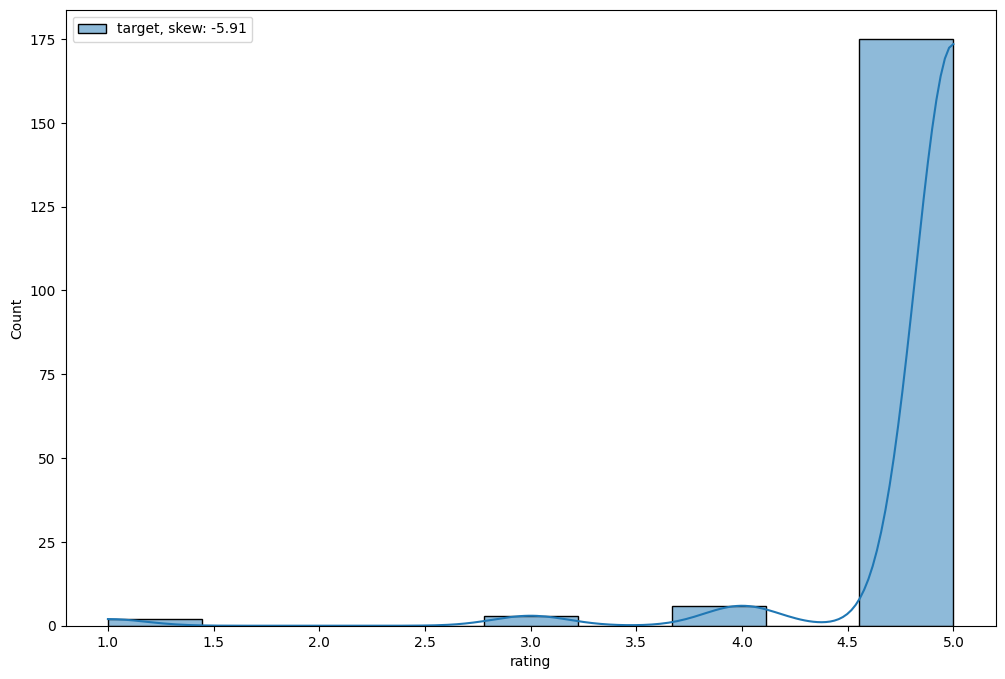

In [151]:
# Visualizing the target variable
plt.figure(figsize=(12, 8))
sns.histplot(dataset_label, kde=True, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()


In [152]:
dataset_label.value_counts()

rating
5.0    175
4.0      6
3.0      3
1.0      2
Name: count, dtype: int64

Ekstraksi Fitur dan Machine Learning

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [154]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [155]:
test_x

113    ['size', 'l', 'nya', 'habis', 'ganti', 'm', 'b...
164                                           ['mantap']
169                                          ['sukaaaa']
101    ['nyesel', 'deh', 'belanja', 'toko', 'the', 'b...
100                      ['bju', 'iya', 'bagus', 'suka']
15     ['bagus', 'deh', 'toko', 'amanah', 'beli', 'pa...
177                                        ['bagusssss']
35     ['inti', 'realpick', 'x', 'belanja', 'lazada',...
119    ['bahan', 'lumayan', 'bagus', 'tipis', 'gak', ...
152               ['barang', 'bagus', 'sesuai', 'pesan']
24     ['order', 'kali', 'cocok', 'kaos', 'kmren', 'k...
76     ['ragu', 'beli', 'iya', 'gais', 'super', 'dupe...
156       ['mksh', 'seller', 'adem', 'ko', 'kaos', 'ny']
118                                                   []
68     ['puas', 'pokok', 'belnaja', 'sni', 'bahan', '...
16     ['nemuin', 'kaos', 'cocok', 'bahan', 'enak', '...
122            ['cocok', 'ukuranya', 'bahanya', 'bagus']
30            ['halus', 'bahany

TF-IDF

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

Naive Bayes

In [157]:
from sklearn.naive_bayes import MultinomialNB

In [158]:
# Pastikan train_x berupa string
train_x = train_x.astype(str)

# Pastikan train_label berupa integer (jika diperlukan)
train_label = train_label.astype(int)


In [159]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB())
])

In [160]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': [0.0001, 0.001, 0.1, 1, 10, 100]
}

In [161]:
classifier_nb = GridSearchCV(
    estimator=classifier_nb,
    param_grid=parameters_nb,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [162]:
classifier_nb.fit(train_x, train_label.to_numpy())


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]},
             verbose=1)

In [163]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.9464285714285714


In [164]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.9464285714285714


In [165]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  1.0
F1 Test set:  0.9203800786369595


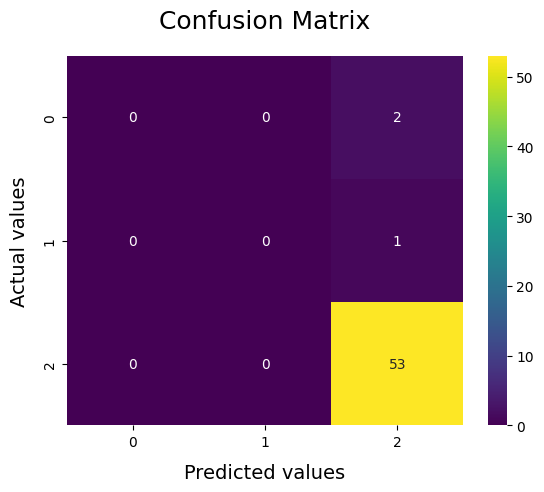

In [166]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [167]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB(alpha=0.0001))])

In [168]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0.0001
tfidf__ngram_range: (1, 2)


Visualisasi

In [169]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
         ]

In [170]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.946429


In [172]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, f1_nb_test, f1_nb_test)
                    ]

In [173]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.946429,0.946429,0.92038,0.92038


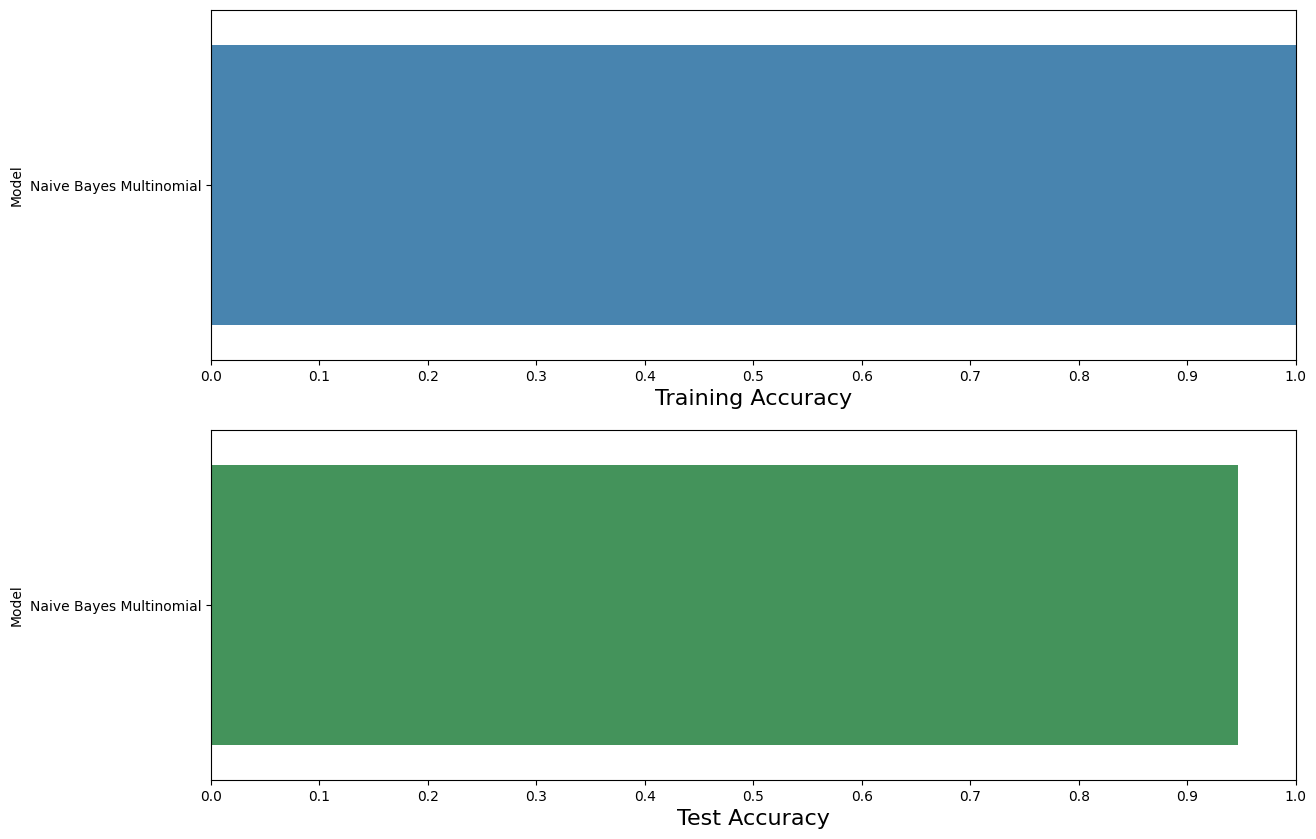

In [176]:
f, axes = plt.subplots(2, 1, figsize=(14, 10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(
    x='Training Accuracy',
    y='Model',
    data=predict,
    palette='Blues_d',
    hue='Model',
    legend=False,
    ax=axes[0]
)
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0, 1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(
    x='Test Accuracy',
    y='Model',
    data=predict,
    palette='Greens_d',
    hue='Model',  
    legend=False, 
    ax=axes[1]
)
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0, 1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [177]:
import joblib

In [178]:
# save the model to disk
joblib.dump(classifier_nb.best_estimator_, 'classifier_nb.best_estimator_.sav', compress=1)

['classifier_nb.best_estimator_.sav']